<h3> About Bajaj Finserv </h3>

>Bajaj Finserv was formed in April 2007 as a result of its demerger from Bajaj Auto Limited to further the Group’s interests in financial services. This demerger enabled Bajaj Finserv to independently run the core businesses of Lending, Protection and savings. Bajaj Finserv Limited is the holding company for the businesses dealing with financial services of the Bajaj Group. It serves millions of customers in the financial services space by providing solutions for asset acquisition through financing, asset protection through general insurance, family protection and income protection in the form of life and health insurance and retirement and savings solutions <br>


__Lending__
Bajaj Finance Limited (BFL), participates in the financial business and is a company listed on The Stock Exchange, Mumbai (the BSE) and the National Stock Exchange (NSE).<br>
BFL also operates through a 100% subsidiary namely, Bajaj Housing Finance Limited (BHFL) which is registered with National Housing Bank (NHB) as a Housing Finance Company (HFC) for its mortgage business. BHFL started its operations in FY2018 and all the incremental mortgage business is now done through BHFL.

__Protection and savings__
These are done through (i) Bajaj Allianz General Insurance Company Limited (BAGIC) for general insurance including health insurance; and (ii) Bajaj Allianz Life Insurance Company Limited (BALIC) for life insurance and retirement plans. BAGIC and BALIC are both unlisted joint ventures with Allianz SE, one of the world’s leading composite insurers.

__Digital and Online Platform__
During the year under review, Bajaj Financial Holdings Ltd., a wholly-owned subsidiary, has firmed up new business plans for undertaking activities on digital and online platform to augment the business of the Company’s subsidiaries and has changed its name to Bajaj Finserv Direct Ltd. with effect from 27 February 2018

In addition, there are wind-farm assets in Maharashtra with an installed capacity of 65.2 MW.

<h3> Importing necessary Modules </h3>

In [1]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning) 
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

import plotly.express as pex
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import xgboost
from hyperopt import hp
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

# from fbprophet import Prophet

<h3> About the Data : </h3>

The data about Bajaj Finserv here is from 26 May 2008 to 30 September 2020.It has been taken from kaggle: https://www.kaggle.com/rohanrao/nifty50-stock-market-data

In [29]:
stock_data = pd.read_csv("Data/BAJAJFINSV.csv")
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [30]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3058 non-null   object 
 1   Symbol              3058 non-null   object 
 2   Series              3058 non-null   object 
 3   Prev Close          3058 non-null   float64
 4   Open                3058 non-null   float64
 5   High                3058 non-null   float64
 6   Low                 3058 non-null   float64
 7   Last                3058 non-null   float64
 8   Close               3058 non-null   float64
 9   VWAP                3058 non-null   float64
 10  Volume              3058 non-null   int64  
 11  Turnover            3058 non-null   float64
 12  Trades              2313 non-null   float64
 13  Deliverable Volume  3058 non-null   int64  
 14  %Deliverble         3058 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 358.5

> The <b>Open and Close </b> features gives the opening and closing price of the stocks on a particular day.

> The <b>High and Low</b> features gives the highest and the lowest price for the stock on a particular day, respectively.

>The <b>Volume</b> feature tells us the total volume of stocks traded on a particular day. 

>The <b>volume weighted average price (VWAP)</b> is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security

In [31]:
stock_data['Date'] = pd.to_datetime(stock_data.Date, format="%Y-%m-%d")

In [32]:
stock_data["year"] = stock_data.Date.dt.year
stock_data["month"] = stock_data.Date.dt.month
stock_data["week"] = stock_data.Date.dt.week
stock_data["day"] = stock_data.Date.dt.day
stock_data["day_of_week"] = stock_data.Date.dt.dayofweek

stock_data.set_index("Date", drop=True, inplace=True)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
stock_data.fillna(stock_data.mean(), inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,year,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,17727.721574,908264,0.2888,2008,5,22,26,0
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,17727.721574,677627,0.1558,2008,5,22,27,1
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,17727.721574,774895,0.1689,2008,5,22,28,2
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,17727.721574,1006161,0.2225,2008,5,22,29,3
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,17727.721574,462832,0.1514,2008,5,22,30,4


<h3> Data Visualisation </h3>

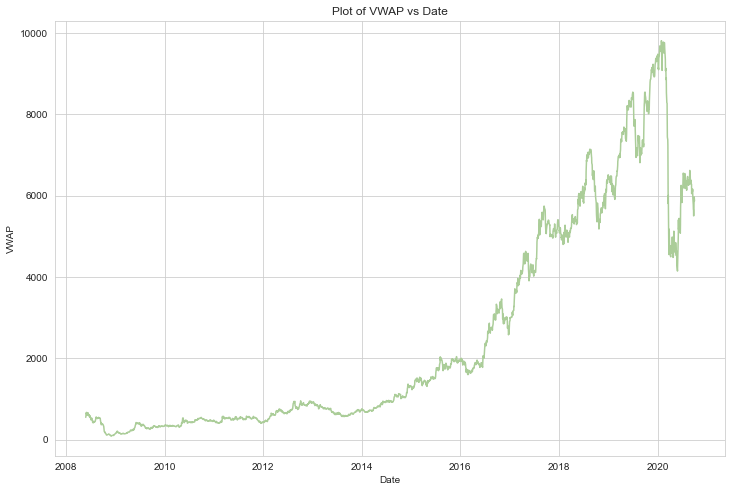

In [34]:
plt.figure(figsize = (12,8))
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('Plot of VWAP vs Date')
plt.plot(stock_data.index, stock_data.VWAP,color = '#ABCD99')

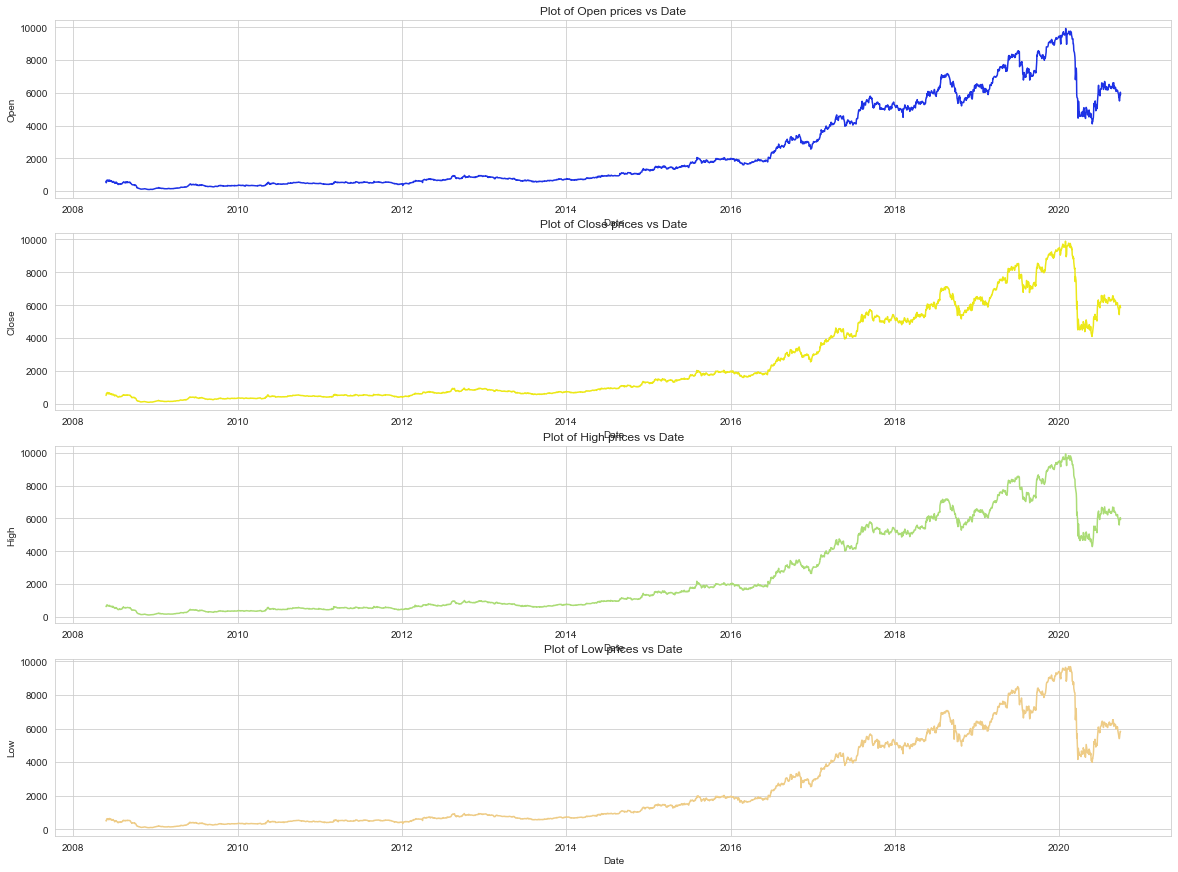

In [35]:
fig, ax = plt.subplots(4,1,figsize = (20,15))

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Open')
ax[0].set_title("Plot of Open prices vs Date")
ax[0].plot(stock_data.index, stock_data.Open,color = '#1E32E5',label = 'Open prices')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close')
ax[1].set_title("Plot of Close prices vs Date")
ax[1].plot(stock_data.index, stock_data.Close,color = '#ECE818',label = 'Close prices')

ax[2].set_xlabel('Date')
ax[2].set_ylabel('High')
ax[2].set_title("Plot of High prices vs Date")
ax[2].plot(stock_data.index, stock_data.High,color = '#ABDC76',label = 'Close prices')

ax[3].set_xlabel('Date')
ax[3].set_ylabel('Low')
ax[3].set_title("Plot of Low prices vs Date")
ax[3].plot(stock_data.index, stock_data.Low,color = '#EECC87',label = 'Close prices')

<h3> Moving Averages of Closing prices by weeks

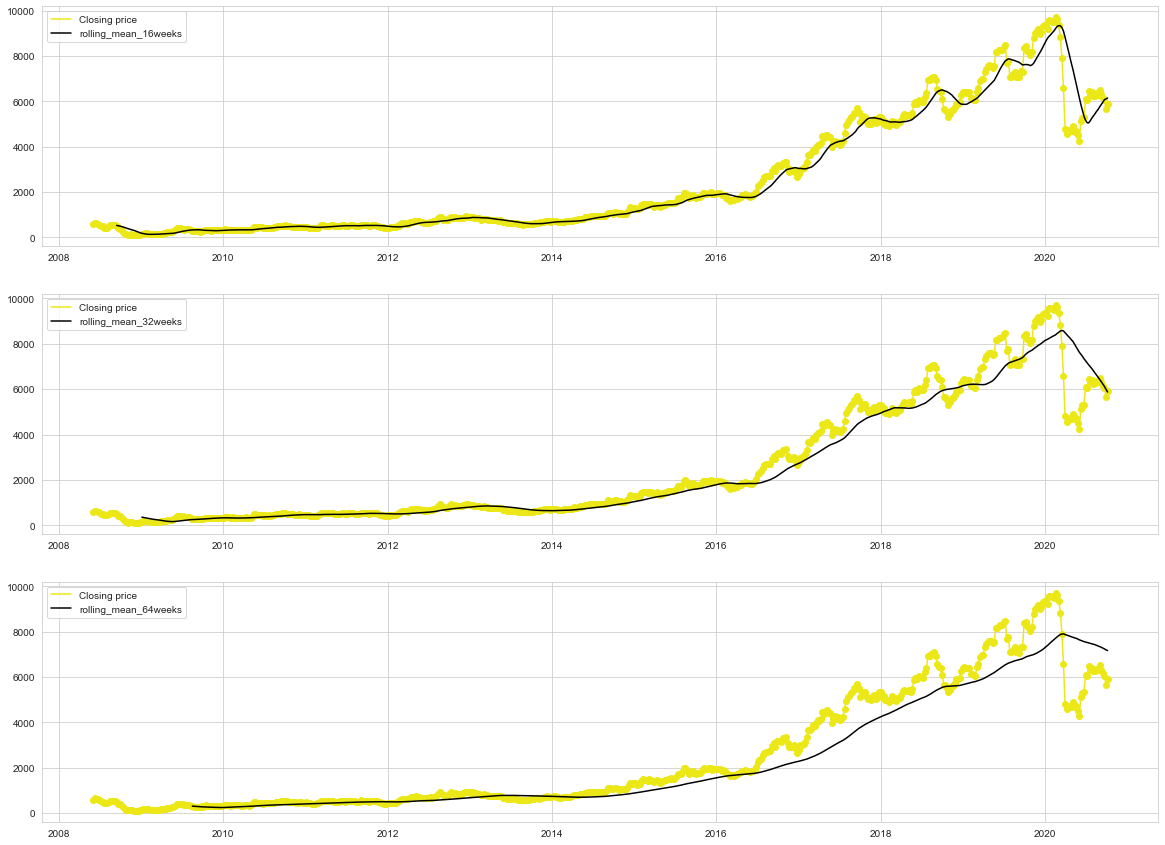

In [36]:
moving_avg = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
moving_avg['Close'] = stock_data['Close'].resample('W').mean()
moving_avg['16_weeks'] = moving_avg['Close'].rolling(window = 16,center = False).mean()
moving_avg['32_weeks'] = moving_avg['Close'].rolling(window = 32,center = False).mean()
moving_avg['64_weeks'] = moving_avg['Close'].rolling(window = 64,center = False).mean()
# print(moving_avg)

fig , ax = plt.subplots(3,1,figsize = (20,15))

ax[0].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[0].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[0].plot(moving_avg.index,moving_avg['16_weeks'],color = "black",label="rolling_mean_16weeks")
ax[0].legend()

ax[1].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[1].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[1].plot(moving_avg.index,moving_avg['32_weeks'],color = "black",label="rolling_mean_32weeks")
ax[1].legend()

ax[2].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[2].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[2].plot(moving_avg.index,moving_avg['64_weeks'],color = "black",label="rolling_mean_64weeks")
ax[2].legend()



<h3> Moving Average of Closing price by Days

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html <br>
We are using DataFrame.asfreq() function. Because it also provide us option of padding.
In this a Method argument is used for filling holes in reindexed Series (note this does not fill NaNs that already were present):
- ‘pad’ / ‘ffill’: propagate last valid observation forward to next valid
- ‘backfill’ / ‘bfill’: use NEXT valid observation to fill.

In case of stock data, on saturdays and sundays, market remains closed, so Friday's close price could be forwarded in closing days.

> For example, in the below data , 26th September and 27th september are Saturday and Sunday respectively, So Friday's(25th September) data are forwarded to those days

In [37]:
stock_daily = stock_data.asfreq('D', method ='pad')
stock_daily.tail(6)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,year,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2020-09-25,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396,5.561124e+14,80709.0,161467,0.1650,2020,9,39,25,4
2020-09-26,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396,5.561124e+14,80709.0,161467,0.1650,2020,9,39,25,4
2020-09-27,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396,5.561124e+14,80709.0,161467,0.1650,2020,9,39,25,4
2020-09-28,BAJAJFINSV,EQ,5803.30,5861.65,6040.00,5820.00,5991.3,5985.95,5967.61,672201,4.011431e+14,56567.0,63755,0.0948,2020,9,40,28,0
2020-09-29,BAJAJFINSV,EQ,5985.95,6031.75,6049.50,5832.55,5848.0,5876.70,5912.44,634635,3.752238e+14,54646.0,40412,0.0637,2020,9,40,29,1
2020-09-30,BAJAJFINSV,EQ,5876.70,5885.00,5929.00,5820.00,5851.0,5852.35,5866.40,375600,2.203421e+14,34577.0,28212,0.0751,2020,9,40,30,2


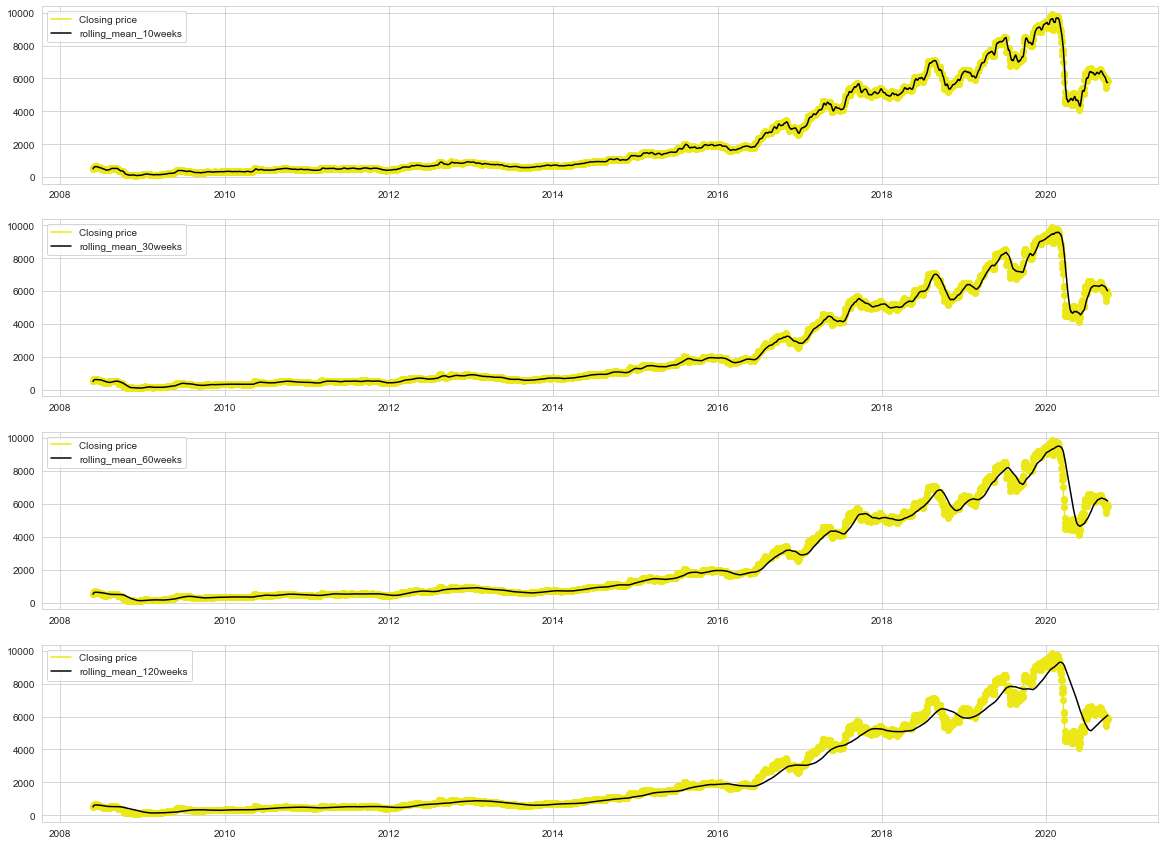

In [38]:
moving_avg_daily = pd.DataFrame()

moving_avg_daily['Close'] = stock_daily['Close']
moving_avg_daily['10_days'] = moving_avg_daily['Close'].rolling(window = 10, min_periods = 1).mean()
moving_avg_daily['30_days'] = moving_avg_daily['Close'].rolling(window = 30, min_periods = 1).mean()
moving_avg_daily['60_days'] = moving_avg_daily['Close'].rolling(window = 60, min_periods = 1).mean()
moving_avg_daily['120_days'] = moving_avg_daily['Close'].rolling(window = 120, min_periods = 1).mean()

fig , ax = plt.subplots(4,1,figsize = (20,15))

ax[0].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[0].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[0].plot(moving_avg_daily.index,moving_avg_daily['10_days'],color = "black",label="rolling_mean_10days")
ax[0].legend()

ax[1].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[1].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[1].plot(moving_avg_daily.index, moving_avg_daily['30_days'],color = "black",label="rolling_mean_30days")
ax[1].legend()

ax[2].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[2].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[2].plot(moving_avg_daily.index, moving_avg_daily['60_days'],color = "black",label="rolling_mean_60days")
ax[2].legend()

ax[3].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[3].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[3].plot(moving_avg_daily.index, moving_avg_daily['120_days'],color = "black",label="rolling_mean_120days")
ax[3].legend()


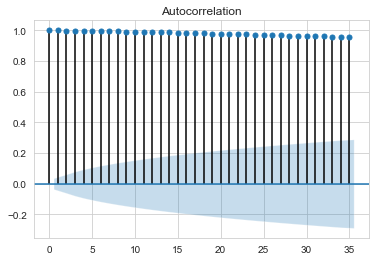

In [39]:
plot_acf(stock_data.Close)
plt.show()

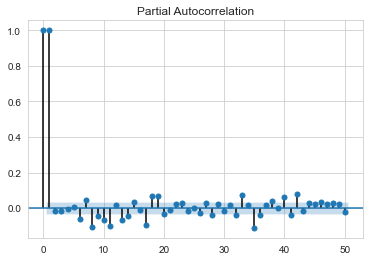

In [40]:
plot_pacf(stock_data.Close, lags=50)
plt.show()

In [16]:
train_X = stock_data[stock_data.year < 2020]
cv_X = stock_data[stock_data.year >= 2020]

model = Prophet()
model.fit(train_X[["Date", "VWAP"]].rename(columns={"Date": "X", "VWAP": "y"}))
forecasted_data = model.predict(cv_X[["Date", "VWAP"]].rename(columns={"Date": "X", "VWAP": "y"}))

NameError: name 'Prophet' is not defined

In [ ]:
model.plot(forecast)
plt.title('Volume Weighted Average Price (VWAP) With Predicted Values')
plt.show()

In [53]:
stock_daily.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,year,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2020-09-26,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396,5.561124e+14,80709.0,161467,0.1650,2020,9,39,25,4
2020-09-27,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396,5.561124e+14,80709.0,161467,0.1650,2020,9,39,25,4
2020-09-28,BAJAJFINSV,EQ,5803.30,5861.65,6040.00,5820.00,5991.3,5985.95,5967.61,672201,4.011431e+14,56567.0,63755,0.0948,2020,9,40,28,0
2020-09-29,BAJAJFINSV,EQ,5985.95,6031.75,6049.50,5832.55,5848.0,5876.70,5912.44,634635,3.752238e+14,54646.0,40412,0.0637,2020,9,40,29,1
2020-09-30,BAJAJFINSV,EQ,5876.70,5885.00,5929.00,5820.00,5851.0,5852.35,5866.40,375600,2.203421e+14,34577.0,28212,0.0751,2020,9,40,30,2


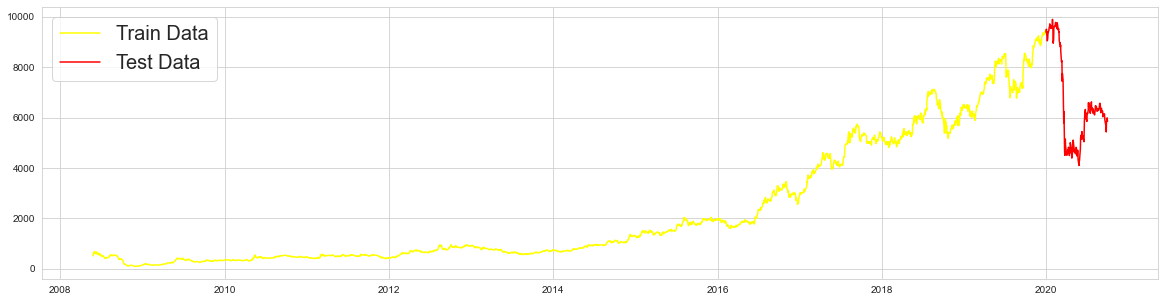

In [92]:
stock_days_2020 = stock_daily[stock_daily.year >= 2020]
stock_days_2020_after_june = stock_days_2020[stock_days_2020.month >= 1]
count_stock_days_before_july_2020 = len(stock_daily) - len(stock_days_2020_after_june)

x = stock_daily['Close']
X_train = []
y_train = []
for i in range(60, count_stock_days_before_july_2020):
    X_train.append(x[i-60:i])
    y_train.append(x[i])

x = stock_daily['Close'][count_stock_days_before_july_2020 :]
X_test = []
y_test = []
for i in range(60, len(stock_days_2020_after_june)):
    X_test.append(x[i-60:i])
    y_test.append(x[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)



plt.figure(figsize = (20,5))
plt.plot(stock_data[stock_data.year < 2020].index,stock_data[stock_data.year < 2020].Close , color = 'yellow',
         label = 'Train Data')
plt.plot(stock_data[stock_data.year >= 2020].index,stock_data[stock_data.year >= 2020].Close, color = 'red',
         label = 'Test Data')
plt.legend(fontsize = 20)

In [93]:
xgb = xgboost.XGBRegressor(random_state = 101, tree_method='gpu_hist')

xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
mean_avg_error = np.round(mean_absolute_error(prediction, y_test), 5)
mean_sq_error = np.round(mean_squared_error(prediction, y_test), 5)
print(' ')
print('Mean Absolute Error :',mean_avg_error)
print('Root Mean Squared Error :',np.sqrt(mean_sq_error))

 
Mean Absolute Error : 196.49968
Root Mean Squared Error : 266.884206183131


k-fold Cross Validation

In [75]:
kfold = KFold(n_splits = 10, shuffle=True)
cv_score = cross_val_score(xgb, X_train, y_train, cv=kfold, n_jobs= -1, scoring = 'neg_mean_absolute_error')
cv_score = np.round(-1 * cv_score.mean(), 5)
print('Cross-Validation Mean Absolute Error :', cv_score)

Cross-Validation Mean Absolute Error : 30.96338


Hyperparameter tuning

In [ ]:
params = {
        'n_estimators': randint(1000, 2000),'learning_rate': uniform(0.01, 0.06),'max_depth': [5, 10, 15, 20],
        'min_child_weight': [1, 5, 10, 15],'subsample': [0.7, 0.05, 0.1],'gamma': [0.1, 0.5, 0.05],
        'colsample_bytree': [0.1, 0.5, 0.05],'alpha' : [0.5, 1, 5],'lambda': [0.1, 1, 3],
}

optimal_model = xgboost.XGBRegressor(random_state = 101, tree_method='gpu_hist')

kfold = KFold(n_splits = 5, shuffle=True)
random_search = RandomizedSearchCV(estimator = optimal_model, param_distributions = params, cv = kfold, verbose = 1, 
                           scoring = 'neg_mean_absolute_error', n_jobs = -1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_ 
best_score = np.round((-1 * random_search.best_score_), 5)

print("Best Parameters : ", best_params)
print("Best Score : ", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Now, we prepare the data for predicting the Close Value on 01-10-2020.

In [47]:
last_60days = stock_daily['Close'][len(stock_daily) - 60 : ]
testing_data = np.array([last_60days])

model = xgboost.XGBRegressor()
model.fit(X_train, y_train)
# predicting the Closing Values for the test data i.e 9 month of 2020
predictions = model.predict(X_test)
# predicting the closing price of 1 October 2020
october_1_pred = model.predict(testing_data)

print('Prediction of close value of bajaj Finserv for 1st October 2020 = Rs ', np.squeeze(october_1_pred))


Prediction of close value of bajaj Finserv for 1st October 2020 = Rs  5968.818


In [94]:
last_30days = stock_daily['Close'][len(stock_daily) - 60 : ]
testing_data = np.array([last_30days])

model = xgboost.XGBRegressor(random_state = 101)
model.fit(X_train, y_train)
# predicting the Closing Values for the test data i.e 9 month of 2020
predictions = model.predict(X_test)
# predicting the closing price of 1 October 2020
october_1_pred = model.predict(testing_data)

print('Prediction of close value of bajaj Finserv for 1st October 2020 = Rs ', np.squeeze(october_1_pred))


Prediction of close value of bajaj Finserv for 1st October 2020 = Rs  5968.818
